# <font color='lightblue'><center>Churn Telecom Analysis</font>

In this project we will use all statistical methods to investigate different research questions from the dataset.

In this project we will:

1.  Introduce our question of interest
2.  Make sure our reader knows enough about the data
3.  Wrangle and preprocess our data so that any one can reporduce our work
4.  Build and test a model that can provide insight into our question
5.  Interpret our model results
6.  Answer different questions of interest.

__Take away 1:__ <br>
1. Can we develop reliable prediction model for customer churn in our company? <br>
We'll develop a detailed report of different accuracy metrics for the classification model.

__Take away 2:__ <br>
The dataset is obtained from the source: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset. <br> The data has Rich, machine readable file format and metadata. We can observe in dataset that most of the features are numerical datatype and data contain no missing values. So, it's a suitable data for analysis and devloping machine learing model.


__Take away 3:__ <br>
The telecom firm is experiencing a high rate of client turnover and is unable to pinpoint the cause. They want us to write an analysis report on which services should be upgraded in order to keep their customers for life time. <br>
We'll create a comprehensive analysis report on the role of various factors in customer turnover, as well as a features-based forecasting model. The predictive algorithm will be able to take company-provided services(fatures) as input and predict whether or not a customer would churn in the future. <br>
Based on input features, we want to build a model that can predict if a client would Churn or Retain (encoded as 0's and 1's). So, it implies that we need to develop supervised classification model.

<h3>Action:</h3> 

__Import python libraries__


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
sns.set(style="whitegrid")
import numpy as np #for scientific computations
plt.style.use('ggplot')
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5

from sklearn.model_selection import train_test_split #for train and test split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import *

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn_df = pd.read_csv('Telecom_churn.csv')
churn_df.head()

,AccountLength,VMMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,IntlPlan,VMPlan,DayCalls,...,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


## <font color='lightblue'>2. Data understanding, exploration, and visualization </font>

## Descriptive Analysis

To begin descriptive analysis, just look at what types of ranges each feature has and how much they move about their average values.

In [3]:
churn_df.describe().T.style.background_gradient(cmap='Set2',low =0.4,high=0.1,axis=0)

,count,mean,std,min,25%,50%,75%,max
AccountLength,3333.000000,101.064806,39.822106,1.000000,74.000000,101.000000,127.000000,243.000000
VMMessage,3333.000000,8.099010,13.688365,0.000000,0.000000,0.000000,20.000000,51.000000
DayMins,3333.000000,179.775098,54.467389,0.000000,143.700000,179.400000,216.400000,350.800000
EveMins,3333.000000,200.980348,50.713844,0.000000,166.600000,201.400000,235.300000,363.700000
NightMins,3333.000000,200.872037,50.573847,23.200000,167.000000,201.200000,235.300000,395.000000
IntlMins,3333.000000,10.237294,2.791840,0.000000,8.500000,10.300000,12.100000,20.000000
CustServCalls,3333.000000,1.562856,1.315491,0.000000,1.000000,1.000000,2.000000,9.000000
IntlPlan,3333.000000,0.096910,0.295879,0.000000,0.000000,0.000000,0.000000,1.000000
VMPlan,3333.000000,0.276628,0.447398,0.000000,0.000000,0.000000,1.000000,1.000000
DayCalls,3333.000000,100.435644,20.069084,0.000000,87.000000,101.000000,114.000000,165.000000


__Inference:__ \
This gives us statistics on the average churn rate of users in the dataset right away. We can observe that on average, 14.49 percent of customers churn.

Now we need to see if individuals with an International Plan (IntlPlan) have a higher average churn rate than those without. To get this information, we'll need two functions. The first is the crosstab Pandas function, which will be used to count the number of occurrences based on two dimensions. As a result, we'd want to see how many people have an international plan and how many churns there are in this situation.

In [4]:
pd.crosstab(churn_df.IntlPlan, churn_df.Churn)

Churn,0,1
IntlPlan,,
0,2664,346
1,186,137


__Inference:__
This gives us some statistics, but they're not really useful. A Pandas DataFrame's groupby method is a more useful function. We must compare the number of customers who have an international plan to those who do not, as well as how many of those customers churn and the average churn rate for both groups.

In [5]:
print('Number of users in each section: \n{}'.format(churn_df[['Churn','IntlPlan']].groupby('IntlPlan').count()))
print('\nNumber of users that churn in each section: \n{}'.format(churn_df[['Churn','IntlPlan']].groupby('IntlPlan').sum()))
print('\nAverage churn rate in each section: \n{}'.format(churn_df[['Churn','IntlPlan']].groupby('IntlPlan').mean()))

Number of users in each section: 
          Churn
IntlPlan       
0          3010
1           323

Number of users that churn in each section: 
          Churn
IntlPlan       
0           346
1           137

Average churn rate in each section: 
             Churn
IntlPlan          
0         0.114950
1         0.424149


We can tell right quickly that consumers who have an international plan have a far lower average churn rate than those who do not (42.4 percent versus 11.5 percent ).

In [6]:
print('\n', pd.pivot_table(churn_df, values='Churn', index=['IntlPlan'], aggfunc=[len,np.sum,np.mean]))
print('\n', pd.pivot_table(churn_df, values='Churn', index=['VMPlan'], aggfunc=[len,np.sum,np.mean]))


            len   sum      mean
         Churn Churn     Churn
IntlPlan                      
0         3010   346  0.114950
1          323   137  0.424149

          len   sum      mean
       Churn Churn     Churn
VMPlan                      
0       2411   403  0.167151
1        922    80  0.086768


__Inference:__
We already knew that customers who had an overseas plan had a greater churn rate, but now we know that the converse is true for persons who have a voicemail plan.

### Visualization for Descriptive Analysis

We looked about how the average churn rate differs based on whether you have a voicemail or an international plan before. It would be amazing, though, if we could see the same outcomes. The most simple way is to plot barcharts for the average churn rate in each of the variables.

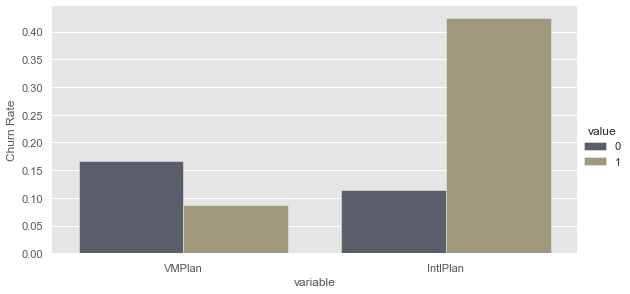

In [7]:
# Create a new temporary dataframe to help us plot these variables.
df1 = pd.melt(churn_df, id_vars=['Churn'], value_vars=["VMPlan","IntlPlan"], var_name='variable' )

# Create a factorplot
g = sns.factorplot( x="variable", y="Churn", hue='value', data=df1, size=4, aspect=2, kind="bar", palette="cividis", ci=None )
g.despine(left=True)
g.set_ylabels("Churn Rate")
plt.show()

__Inference:__ Most features have a numerical range that extends beyond 0 and 1. As a result, it's interesting to see how the data distribution differs between churners and non-churners. There are two ways to accomplish this.

To begin, if a variable has a minimal number of different values/categories, we may create a similar bar-chart (factorplot) for each of those values, reflecting the average churn-rate for that specific value. The CustServCalls variable, which has a range of 0 to 9, will be used to try this.

In [8]:
df2 = pd.pivot_table(churn_df, values='Churn', index=['CustServCalls'])
df2['ix'] = df2.index.values
df2

,Churn,ix
CustServCalls,,
0,0.131994,0
1,0.103302,1
2,0.114625,2
3,0.102564,3
4,0.457831,4
5,0.606061,5
6,0.636364,6
7,0.555556,7
8,0.500000,8


A graphic depiction is much easier to grasp. We'll use the barplot for this.

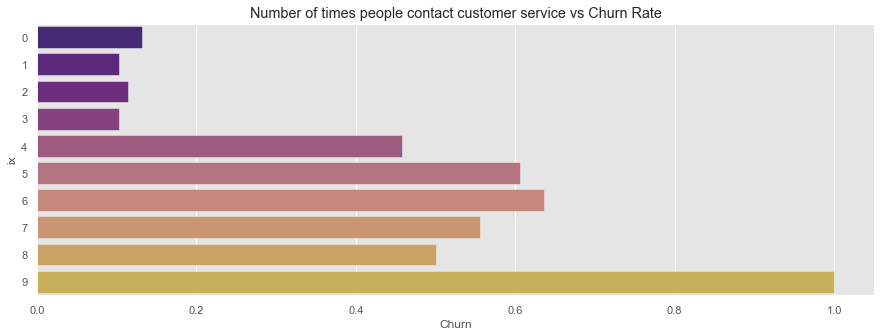

In [9]:
sns.barplot(y="ix", x= "Churn", data=df2, palette="plasma", saturation=.5, orient = 'h')
plt.title("Number of times people contact customer service vs Churn Rate")
plt.show()

__Inference:__ This is an intriguing observation: consumers who call customer support more frequently also churn more: intriguing, but not surprising.

__Note:__ As a consequence, when a feature has a narrow range of values and those values are discrete, these techniques appear to work well. When working with larger ranges and more continuous characteristics, these graphs become less useful. Looking at a variable's distribution or kernel-density makes more sense at this stage. For these visualisations, we'll utilise the violinplot from the seaborn library.

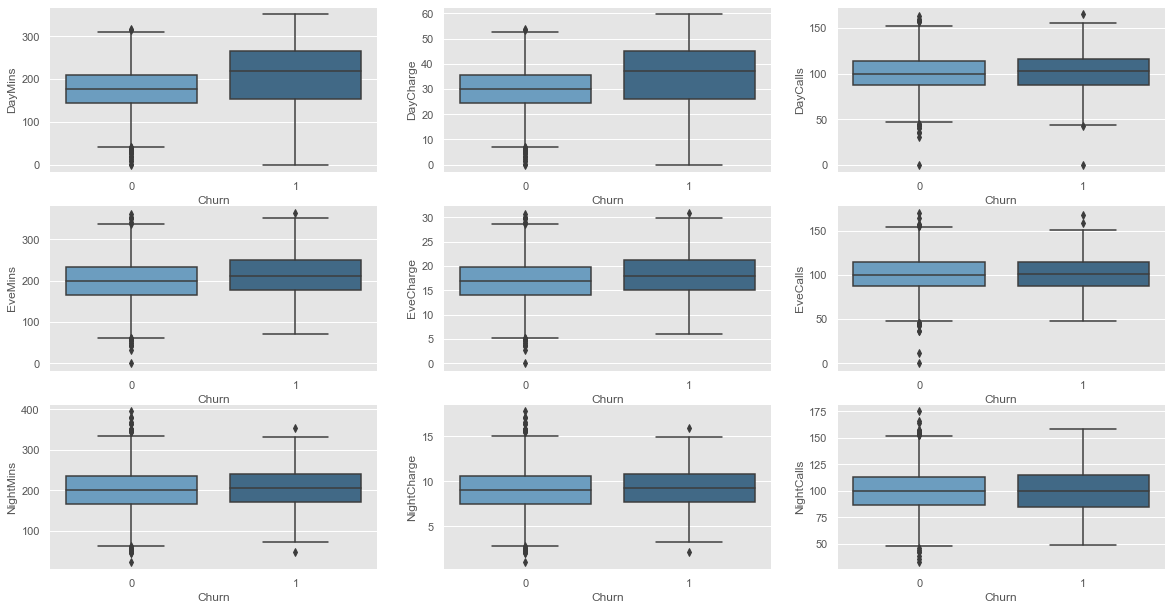

In [10]:
#For these visualisations we will use the boxplot from the seaborn library.
plt.figure(figsize=(20, 14))

for e, column in enumerate(['DayMins','DayCharge','DayCalls',
                            'EveMins','EveCharge','EveCalls',
                            'NightMins','NightCharge','NightCalls']):
    plt.subplot(4, 3, e + 1)
    sns.boxplot( data=churn_df, x='Churn', y=column, palette="Blues_d")


__Possible factors to analyze:__
1. Data component -- what kinds of data are we dealing with?
2. Graphical component -- what kinds of plot can we use?
3. Label component -- what should be on the plot axis?
4. Esthetic component -- what should we plot say, and how best to do this?
5. Ethical component -- Is the graph misleading, what is left out?

<h4> Inference: </h4> Boxplots are a better approach to show how features are distributed because we're working with bigger ranges and more continuous characteristics.

The y-axis of each graph shows the names of the features, while the x-axis shows the churn variable's discrete values. The y-axis scale of each plot is dictated by the range of feature values.

To make the storey more accessible, we used the darkgrid background from the seaborn library.
The DayMins and DayCharge graphs are the most fascinating of all the others. These two will very certainly be linked, as the fee will be based on the number of minutes utilised and a tariff.

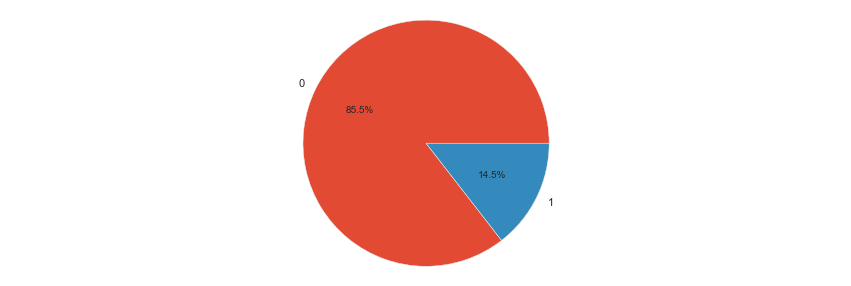

In [11]:
labels = churn_df["Churn"].value_counts().keys().tolist()
sizes = churn_df["Churn"].value_counts().values.tolist()

# Plot
plt.pie(sizes, labels=labels,
autopct = '%1.1f%%', radius = 3)

plt.axis('equal')
plt.show()

__Inference:__ The pie-plot shows a __retention rate of 85.5% and churn rate of 14.5% in Telecom company.__

**Action:** Use correlation to estimate the relationship between some of the key variables. Try exploring for interesting relationships using heatmaps.

<AxesSubplot:>

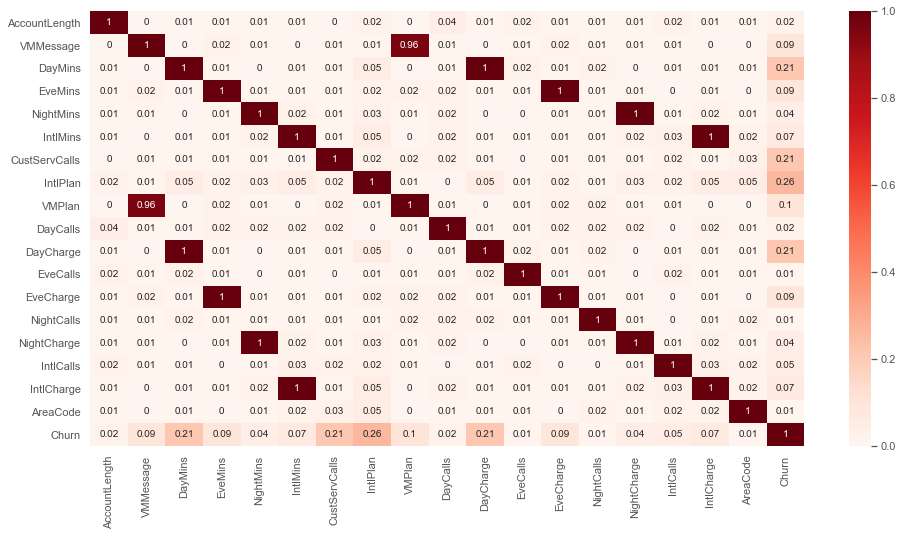

In [12]:
#Let's visualize correlations
plt.figure(figsize=(16, 8))
sns.heatmap(churn_df.corr().abs().round(2),annot=True, cmap=plt.cm.Reds)

__Inference:__ We can depict from the above plot that Churn feature has significant positive correlation with DayMins (0.21), CustServCalls (0.21), IntlPlan(0.26) and DayCharge(0.21). <br>
These features would be most significant predictors in developing a classification model for customer churn predictions. The values with higher correlation coefficient have darker red color in squares.

## <font color='lightblue'> Discussion</font>

 Did this exploritory data analysis help us better understand our chosen dataset? If so how? Is there still parts that don't make sense? <br>
<br>
The descriptive statistics instantly provide us some information about the average churn rate of users in dataset. We can see that, on average, 14.49% of the users churns. In each characteristic, the description table displays different statistical insights such as minimum, maximum, and standard deviation. <br>
In data, certain features have a normal distribution, whereas others have a bimodel distribution.
The correlation matrix demonstrates that Cusomter Churn has a significant association with predictors, indicating that we can use Machine Learning approaches to construct an efficient predictive model from this data.

#### Preprocessing and Feature Engineering


Preprocessing and feature engineering are two of the most important phases in data analysis. We'll look at how we can use existing data to extract essential qualities for prediction at this stage. 

In [16]:
churn_df.drop('Phone', axis=1, inplace=True)

__Inference:__
We may assume that the number of minutes spent on the phone is proportionate to the number of calls placed. The number of calls shows activity, but so does the amount of minutes spent on each call. As a consequence, I created a new variable with the average number of minutes spent on each call.

In [17]:
churn_df['DayMinsPerCall'] = churn_df['DayMins'] / churn_df['DayCalls']
churn_df['EveMinsPerCall'] = churn_df['EveMins'] / churn_df['EveCalls']
churn_df['NightMinsPerCall'] = churn_df['NightMins'] / churn_df['NightCalls']
churn_df['DayPricePerMin'] = churn_df['DayCharge'] / churn_df['DayMins']
churn_df['EvePricePerMin'] = churn_df['EveCharge'] / churn_df['EveMins']
churn_df['NightPricePerMin'] = churn_df['NightCharge'] / churn_df['NightMins']

This code will output the new features correctly, but it will also insert NaN's because it divides by zero. To deal with this, we need to make sure that all NaN values are zero.

In [18]:
for col in ['DayMinsPerCall','EveMinsPerCall','NightMinsPerCall','DayPricePerMin','EvePricePerMin','NightPricePerMin']:
    print(col, churn_df[col].isnull().sum())
    churn_df.loc[churn_df[col].isnull(),col] = 0

DayMinsPerCall 2
EveMinsPerCall 1
NightMinsPerCall 0
DayPricePerMin 2
EvePricePerMin 1
NightPricePerMin 0


__Inference:__ A variable already contains the number of voicemail messages. Because it also contains the number 0 for certain samples, it may be difficult for some algorithms to assign any meaning to it because it would be multiplying with a 0. It could be a good idea to add a new variable that indicates whether or not there are any voicemail messages. NoVMMessages is a variable that will be set to 1 if there are no voicemail messages and 0 if there are.

In [19]:
churn_df['NoVMMessages'] = churn_df['VMMessage'].apply( lambda x: 1.0*(x<1))

__Inference:__ Because we have the latitude and longitude for each state now we can also drop the column that has the state code.

## <font color='lightblue'> Classification Model </font>

#### Seperate the independent and target variables

In [20]:
## Selecting the independet variables that have good correlation with customer churn.
X = churn_df[['VMMessage', 'DayMinsPerCall','EveMinsPerCall','NightMinsPerCall','DayPricePerMin','EvePricePerMin','NightPricePerMin', 'CustServCalls', 'IntlPlan']]
y = churn_df['Churn']

__Train and test split for classification model__

In [21]:
#Split the dataset with 70% data for training and 30% for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

### Data Preprocessing

Feature scaling is required by machine learning systems that determine data distances. If the feature with the higher value range is not scaled, the feature with the higher value range takes precedence for computing distances. A technique for normalising a group of independent variables or data components is feature scaling. In data processing, it's also known as data normalisation.

In [22]:
from sklearn import preprocessing
## Standare scaling for X_train X_test dataset
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[:5]

array([[-5.84935533e-01, -1.13333753e+00,  6.21428133e-01,
         2.04941298e-01,  1.77425466e+00,  1.89966161e-03,
         2.10674003e-01,  3.18977610e-01, -3.26624052e-01],
       [-5.84935533e-01, -1.09425459e+00, -4.35314901e-01,
         2.15120160e-01, -1.03621210e-01,  4.48620878e-03,
        -1.57556397e-01,  1.81351945e+00, -3.26624052e-01],
       [-5.84935533e-01,  1.34251125e+00,  1.05993769e+00,
        -1.30424060e-01,  2.18927613e-01,  2.78895243e-02,
        -1.49076120e-02, -4.28293311e-01,  3.06162389e+00],
       [-5.84935533e-01, -7.82620937e-01,  1.00603439e+00,
        -1.39339573e+00, -9.51550978e-01,  1.86001345e-02,
         1.67823621e+00, -4.28293311e-01, -3.26624052e-01],
       [-5.84935533e-01,  5.25770183e-01,  1.70659302e+00,
        -2.06967797e-01, -2.69443814e-01,  2.88662532e-02,
        -1.49076120e-02, -1.17556423e+00, -3.26624052e-01]])

## <font color='lightblue'> Build and test a model</font>



**Action:** Using our training dataset to build a model with the goal addressing our question of interest.

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# will append scores here for plotting later
test_scores = []
train_scores = []

# testing k values from 1-14
for i in range(1,15):
    # create a model with k=i
    knn = KNeighborsClassifier(i)
    # train the model
    knn.fit(X_train,y_train)
    
    # append scores. 
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

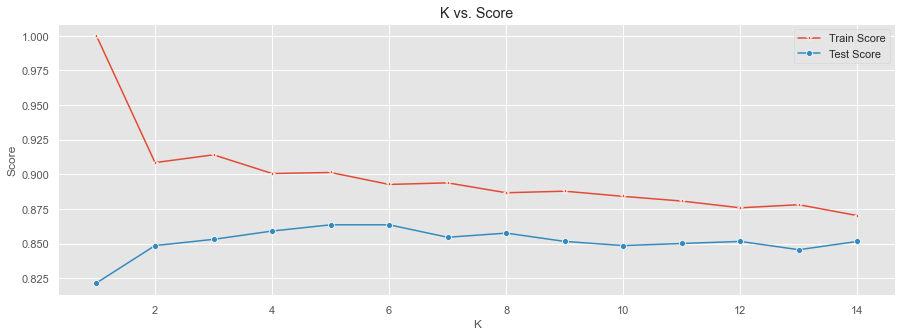

In [24]:
sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Test Score')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

__Inference:__ The best result seems to be captured at k = 9 thus 9 will be used for the final model. At this value our train and test scores don't vary significantly.

In [25]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('The accuracy score for KNN classifer is: ', knn.score(X_test,y_test))

The accuracy score for KNN classifer is:  0.863568215892054


**Q4**: Measure the performance of our model, and describe how well our model generalizes to new data.

We divided the data into two parts to see how our model performs on real-world data: training data and testing data. The Testing dataset serves as unknown data for the model after it has been trained using training data. <br>
We'll create a confusion matrix to describe prediction outcomes on a classification issue, as well as a classification report that shows precision, recall, and the f1-score of classification.
<br>
__Precision:__ The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive. <br>
__Recall:__ The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples. <br>
__F1-score:__ F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       566
           1       0.59      0.34      0.43       101

    accuracy                           0.86       667
   macro avg       0.74      0.65      0.68       667
weighted avg       0.84      0.86      0.85       667



<AxesSubplot:>

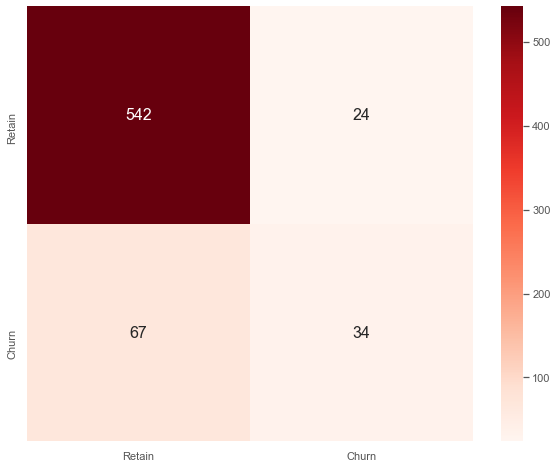

In [26]:
# Compute confusion matrix
from sklearn.metrics import *
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_accuracy

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))
plt.figure(figsize=(10,8))

x_axis_labels = ['Retain', 'Churn'] # labels for x-axis
y_axis_labels = ['Retain', 'Churn'] # labels for y-axis


sns.heatmap(cnf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels,
            annot=True, annot_kws={"size": 16}, fmt="d", cmap=plt.cm.Reds)

## <font color='lightblue'> Interpret the model</font>

**Q5**: Interpreting our model results. E.g., what features contributed to our predictions, if possible, can we determine the sign and magnitude of the effect.

### Permutation Feature Importance:

Permutation feature importance is a technique for calculating relative importance scores that is independent of the model used.
We'll compute the contribution of different features in dataset in estimating the target feature -> CHURN. <br>
We'll find the top important features and their correspoding scores in feature estimation/prediction.

Feature: 0, Score: 0.02039
Feature: 1, Score: 0.03688
Feature: 2, Score: 0.02309
Feature: 3, Score: 0.01469
Feature: 4, Score: -0.00150
Feature: 5, Score: 0.00030
Feature: 6, Score: 0.01769
Feature: 7, Score: 0.03718
Feature: 8, Score: 0.02159


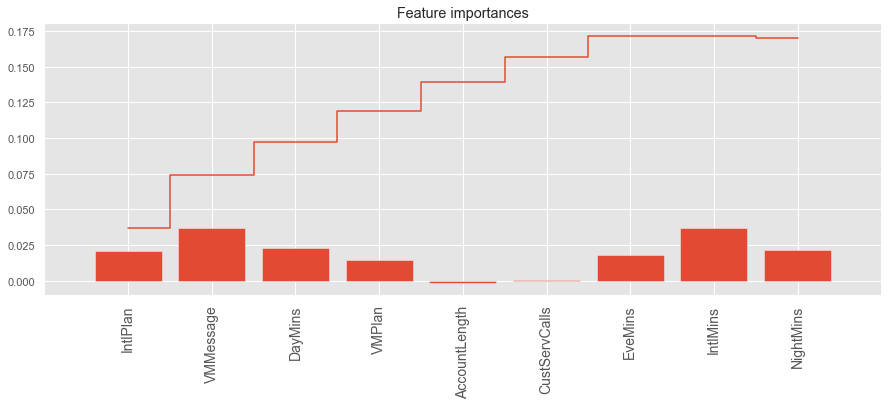

In [27]:
from matplotlib import pyplot
from sklearn.inspection import permutation_importance

results = permutation_importance(knn, X_test, y_test, scoring='neg_mean_squared_error')
feat_names = churn_df.drop(['Churn'],axis=1).columns

# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
indices = np.argsort(importance)[::-1]

pyplot.title("Feature importances")

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
pyplot.step(range(len(indices)), np.cumsum(importance[indices]), where='mid', label='Cumulative')
plt.xlim([-1, len(indices)])

pyplot.show()

## <font color='lightblue'> Answering our question</font>

**Q6:** Using our analysis above to answer our question of interest. Did we achieve our desired outcome, and what might the next steps be?

__Inference:__ We have developed a classification model with an accuracy score of 87.40%, as evidenced by the above results. More training data, implementing different algorithms and determining which one best fits our model, and hyperparameter optimization can all help to further improve the model's accuracy.

### SVM Model

In [28]:
#Fitting a decision tree with default hyper parameters
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)

Text(0.5, 1.0, 'Decision Tree classification Model for Validation Data')

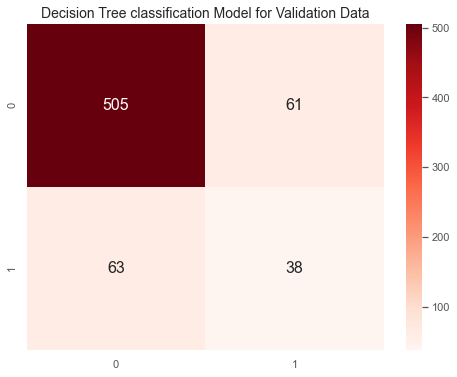

In [29]:
plt.figure(figsize=(8,6))

y_pred3= tree.predict(X_test)

DT_accuracy = accuracy_score(y_test, y_pred3)
DT_accuracy

sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, annot_kws={"size": 16}, fmt="d", cmap=plt.cm.Reds)
plt.title("Decision Tree classification Model for Validation Data",fontsize=14)

### Random Forest Model

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [31]:
print("Training accuracy: ",rf.score(X_train,y_train))
RF_acc_score = accuracy_score(y_test, pred_rf)

Training accuracy:  1.0


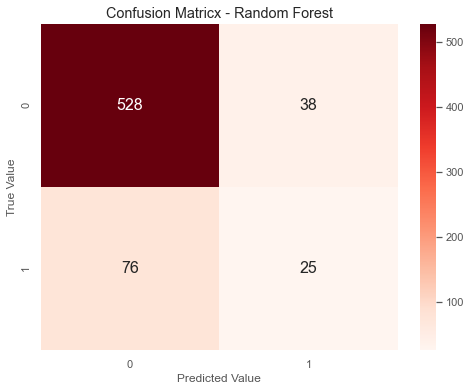

In [32]:
plt.figure(figsize=(8,6))

sns.heatmap(confusion_matrix(y_test, pred_rf), annot=True, annot_kws={"size": 16}, fmt="d", cmap=plt.cm.Reds)
plt.title("Confusion Matricx - Random Forest")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty='l2')

In [34]:
logreg.fit(X_train, y_train)
predicted = logreg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, predicted)
log_reg_accuracy

0.8425787106446777

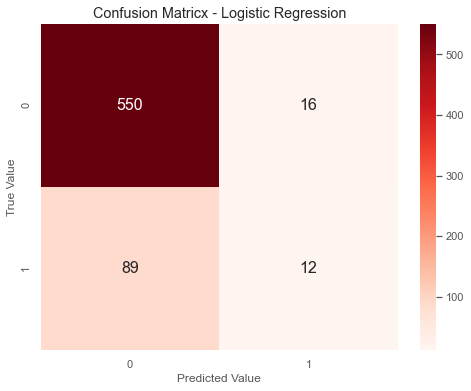

In [35]:
plt.figure(figsize=(8,6))

sns.heatmap(confusion_matrix(y_test, predicted), annot=True, annot_kws={"size": 16}, fmt="d", cmap=plt.cm.Reds)
plt.title("Confusion Matricx - Logistic Regression")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.show()

### Compare the perfomance of three classification models using Accuracy-score

In [36]:
Results = pd.DataFrame({
    'Machine Learning Model': ['Logistic Regression', 'KNN Score', 'Decision Tree accuracy', 'Random Forest Model'],
    'Accuracy-score':   [log_reg_accuracy,
                        KNN_accuracy,
                        DT_accuracy, 
                        RF_acc_score]})
outcome = Results.sort_values(by='Accuracy-score', ascending=False)
outcome = outcome.set_index('Accuracy-score')
outcome

,Machine Learning Model
Accuracy-score,
0.863568,KNN Score
0.842579,Logistic Regression
0.829085,Random Forest Model
0.814093,Decision Tree accuracy


__Inference:__ The above results hosws that KNN and Logistic Regression have highest accuracy scores for classification.

### Hyperparameter optimization for  Logistic Regression and KNN

In [37]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.8589620117710005


#### KNN Model

In [38]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,15))
n_neighbors = list(range(1,15))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 6


In [39]:
print("tuned hpyerparameters for KNN :(best parameters) ",best_model.best_params_)
print("Accuracy :",best_model.best_score_)

tuned hpyerparameters for KNN :(best parameters)  {'leaf_size': 1, 'n_neighbors': 6, 'p': 2}
Accuracy : 0.8660851567120048


__Inference:__ After optimising hyperparameters, the KNN model achieves the highest accuracy of 86.60 percent. By integrating more relevant characteristics in the classification model and including more training data in the model, the predictive model's accuracy can be further improved.

<center> <h2> THE END